In [56]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [57]:
#import the data
CADGBP = yf.Ticker("CADGBP=X")

In [58]:
data = yf.download("CADGBP=X", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [59]:
data.head()

Date
2017-01-02    0.60206
2017-01-03    0.60560
2017-01-04    0.60820
2017-01-05    0.60970
2017-01-06    0.60830
Name: Adj Close, dtype: float64

In [60]:
data.tail()

Date
2022-08-04    0.64088
2022-08-05    0.63899
2022-08-08    0.64053
2022-08-09    0.64355
2022-08-10    0.64278
Name: Adj Close, dtype: float64

In [61]:
log_returns = np.log(1 + data.pct_change())

In [62]:
log_returns.tail()

Date
2022-08-04    0.003047
2022-08-05   -0.002953
2022-08-08    0.002407
2022-08-09    0.004704
2022-08-10   -0.001197
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price CAD')

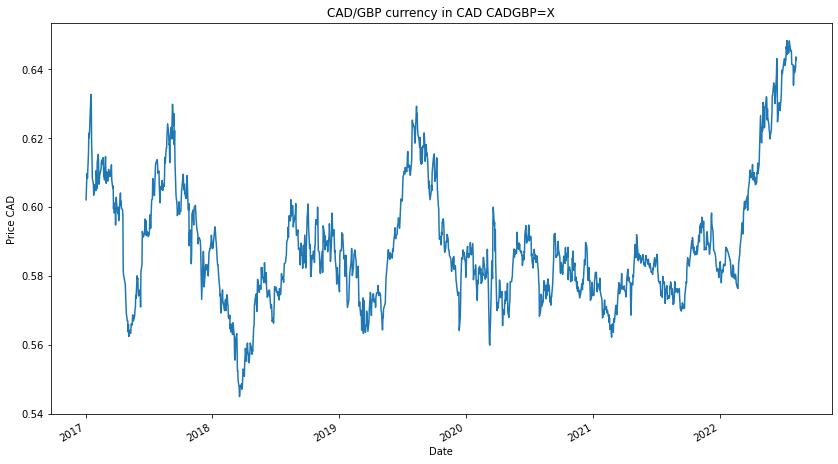

In [63]:
data.plot(figsize=(14,8))
plt.title('CAD/GBP currency in CAD CADGBP=X')
plt.ylabel('Price CAD')

In [64]:
u = log_returns.mean()
u

4.482560783917819e-05

In [65]:
var = log_returns.var()
var

2.699897056749406e-05

In [66]:
stdev = log_returns.std()
stdev

0.005196053364573353

In [67]:
drift = u - (0.5 * var)
drift

3.132612255543116e-05

In [68]:
np.array(drift)

array(3.13261226e-05)

In [69]:
np.array(stdev)

array(0.00519605)

In [70]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [71]:
x = np.random.rand(10,2)
x

array([[0.67775707, 0.88590868],
       [0.93004251, 0.11051459],
       [0.71061071, 0.92800891],
       [0.2952772 , 0.63511206],
       [0.6279347 , 0.52363115],
       [0.47348134, 0.07343313],
       [0.84138962, 0.07299918],
       [0.20184682, 0.77154123],
       [0.08089701, 0.30903314],
       [0.96613668, 0.69903998]])

In [72]:
norm.ppf(x)

array([[ 0.46143597,  1.20505353],
       [ 1.47610772, -1.22379605],
       [ 0.55516971,  1.46112121],
       [-0.5380328 ,  0.34542366],
       [ 0.32638829,  0.0592692 ],
       [-0.06652144, -1.45068978],
       [ 1.00018546, -1.45381227],
       [-0.83504273,  0.74393213],
       [-1.39906323, -0.49859279],
       [ 1.82682132,  0.52164139]])

In [73]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.66169534,  0.81354343],
       [ 2.24835315,  0.41623091],
       [-0.88915124,  0.52121551],
       [-0.89830573,  0.29599408],
       [ 0.68948461, -2.51878495],
       [-0.90794537, -0.46776331],
       [-1.72861374, -0.30134437],
       [ 1.43585005, -0.10591166],
       [-0.91867375,  1.22047428],
       [-0.45973889,  0.05189991]])

In [74]:
t_intervals = 120
interations = 500

In [75]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[0.99854508, 0.99714734, 1.00313328, ..., 1.0026177 , 0.98602962,
        1.00202287],
       [1.00768532, 1.00666729, 1.00423893, ..., 1.00116543, 0.99417107,
        0.99645601],
       [0.98872853, 1.00414642, 1.00119256, ..., 1.00260379, 0.99564647,
        1.00050723],
       ...,
       [0.99667263, 0.99721185, 0.99625281, ..., 0.99719025, 0.99559565,
        1.00849796],
       [1.00193089, 1.00692746, 1.00214408, ..., 1.00053787, 0.99933203,
        0.99646676],
       [1.00695334, 1.01050859, 1.00579216, ..., 0.98976119, 1.00379676,
        0.99549394]])

In [76]:
s_zero = data.iloc[-1]
s_zero

0.6427800059318542

In [77]:
price_list = np.zeros_like(daily_returns)

In [78]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
price_list[0] = s_zero
price_list

array([[0.64278001, 0.64278001, 0.64278001, ..., 0.64278001, 0.64278001,
        0.64278001],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [80]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [81]:
price_list

array([[0.64278001, 0.64278001, 0.64278001, ..., 0.64278001, 0.64278001,
        0.64278001],
       [0.64771998, 0.64706561, 0.6455047 , ..., 0.64352912, 0.63903328,
        0.640502  ],
       [0.64041922, 0.64974861, 0.64627451, ..., 0.64520473, 0.63625123,
        0.64082689],
       ...,
       [0.64708143, 0.61804909, 0.64676396, ..., 0.65262415, 0.65147757,
        0.65983034],
       [0.64833087, 0.6223306 , 0.64815068, ..., 0.65297517, 0.65104241,
        0.657499  ],
       [0.65283893, 0.62887042, 0.65190487, ..., 0.64628949, 0.65351426,
        0.65453628]])

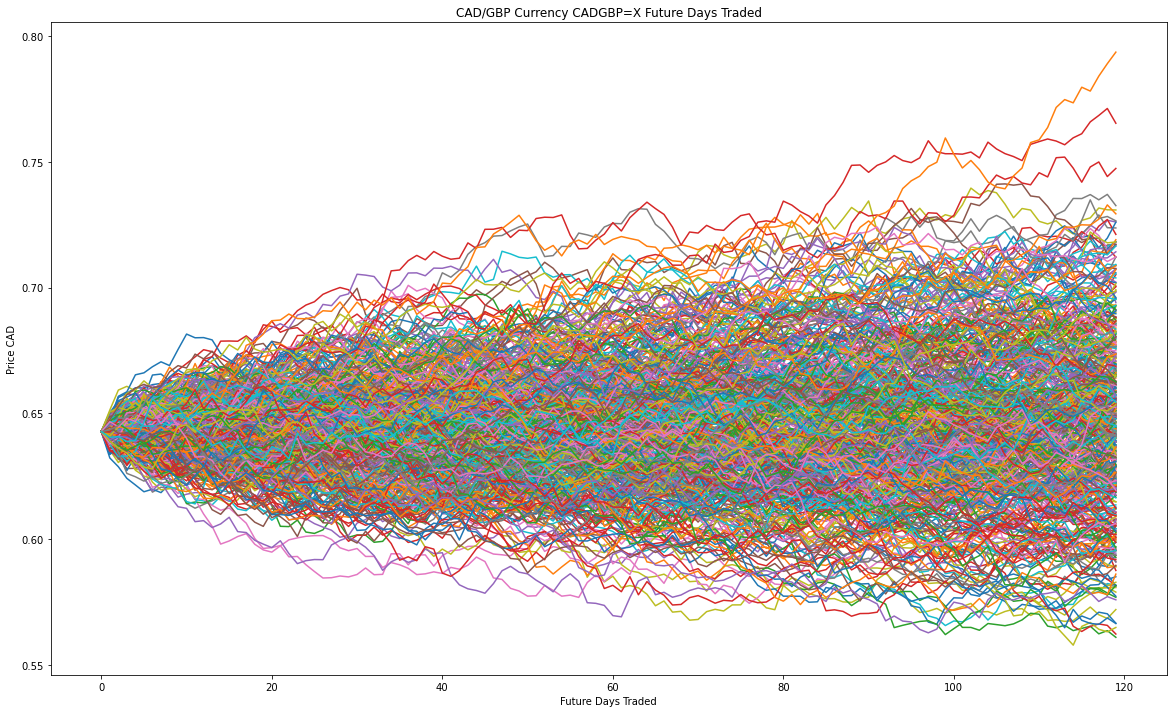

In [82]:
plt.figure(figsize=(20,12))
plt.title('CAD/GBP Currency CADGBP=X Future Days Traded')
plt.xlabel('Future Days Traded')
plt.ylabel('Price CAD')
plt.plot(price_list)